# fig4. a

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
gene_set_pridict_plot=pd.read_csv("DATA/fig4/gene_set_pridict_plot.csv")

df1=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="low_CV_rank"]
df2=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="high_corr"]
df3=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="high_feature"]
df4=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="rRNA_ribosome"]
df5=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="tRNA_related"]
df6=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="HK"]
df7=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="high_CV"]
df8=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="high_feature_2"]
df9=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="random"]

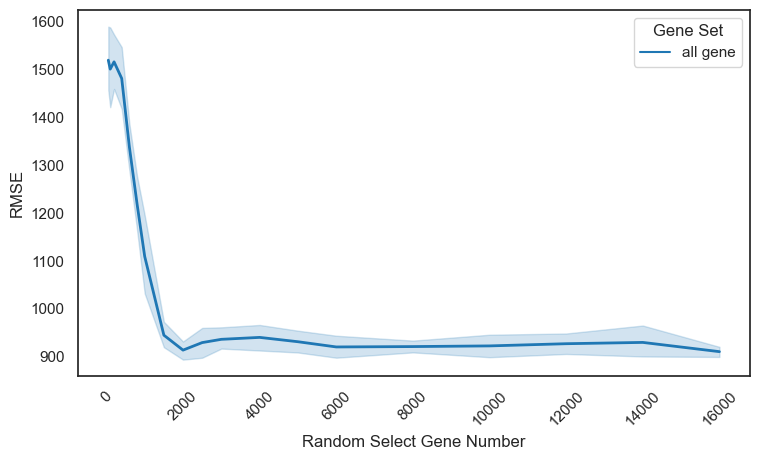

In [5]:
merged_df = pd.concat([df9.assign(Gene_Set='all gene')])
plt.figure(figsize=(8, 5))
sns.set_context("notebook", rc={"font.size": 20})
sns.set_style("white")
sns.lineplot(x="gene_number", y="rmse", hue="Gene_Set", data=merged_df, linewidth=2)
plt.xlabel("Random Select Gene Number")
plt.ylabel("RMSE") 
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend(title="Gene Set", loc='upper right')
plt.tight_layout()
plt.show()

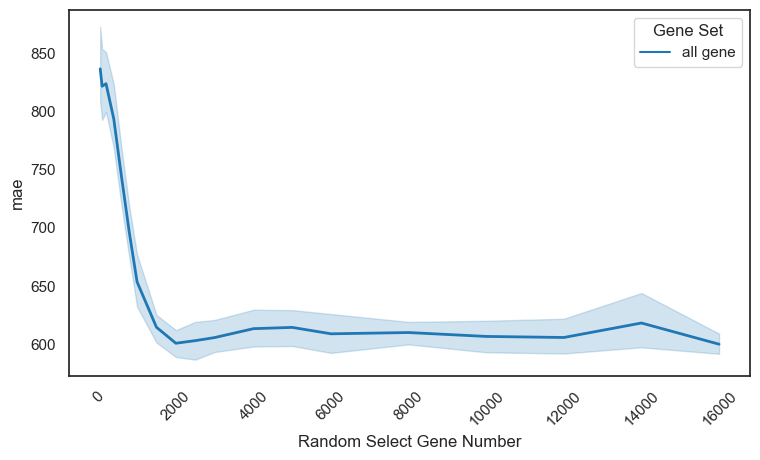

In [6]:
merged_df = pd.concat([df9.assign(Gene_Set='all gene')])
plt.figure(figsize=(8, 5))
sns.set_context("notebook", rc={"font.size": 20})
sns.set_style("white")
sns.lineplot(x="gene_number", y="mae", hue="Gene_Set", data=merged_df, linewidth=2)
plt.xlabel("Random Select Gene Number")
plt.ylabel("mae")
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend(title="Gene Set", loc='upper right')
plt.tight_layout()
plt.show() 

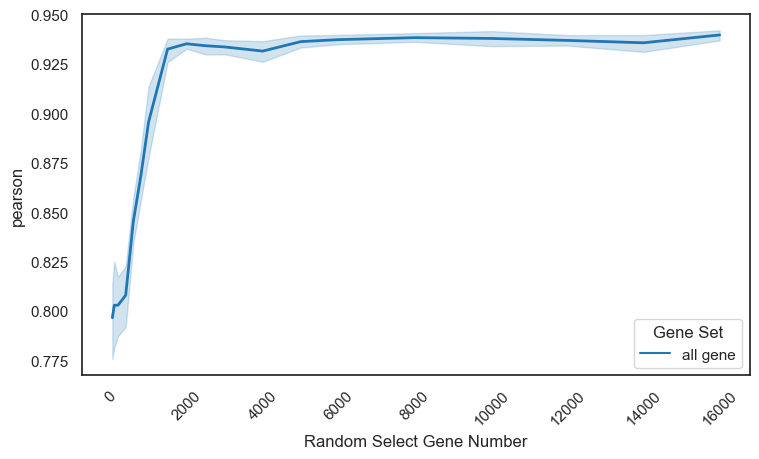

In [7]:
merged_df = pd.concat([df9.assign(Gene_Set='all gene')])
plt.figure(figsize=(8, 5))
sns.set_context("notebook", rc={"font.size": 20})
sns.set_style("white")
sns.lineplot(x="gene_number", y="pearson", hue="Gene_Set", data=merged_df, linewidth=2)
plt.xlabel("Random Select Gene Number")
plt.ylabel("pearson")
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend(title="Gene Set", loc='lower right')
plt.tight_layout() 
plt.show()

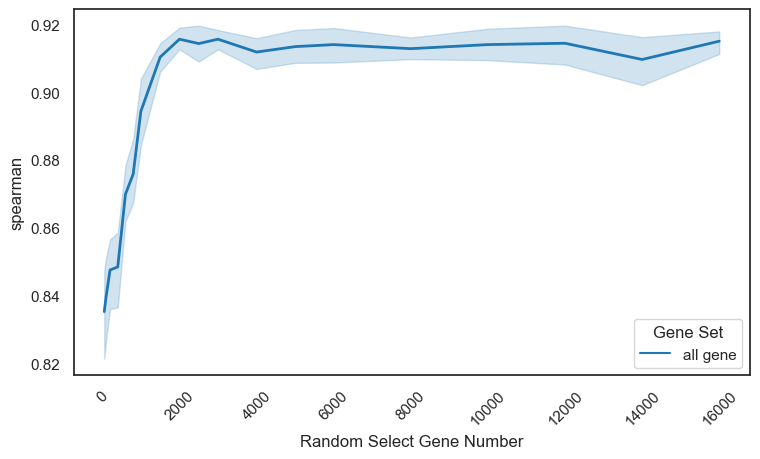

In [8]:
merged_df = pd.concat([df9.assign(Gene_Set='all gene')])
plt.figure(figsize=(8, 5))
sns.set_context("notebook", rc={"font.size": 20})
sns.set_style("white")
sns.lineplot(x="gene_number", y="spearman", hue="Gene_Set", data=merged_df,linewidth=2)  # 设置x、y轴以及调色板和晶须，并去掉离群值
plt.xlabel("Random Select Gene Number")
plt.ylabel("spearman")
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend(title="Gene Set", loc='lower right')
plt.tight_layout()
plt.show()

# fig4. b

In [1]:
import fastcluster
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

housekeeping_genes    3377
high_corr             3000
low_CV_rank           3001
high_CV_rank          2999
high_feature          3548
tRNA_related          1374
rRNA_ribosome         1714
high_feature_2        2550
dtype: int64


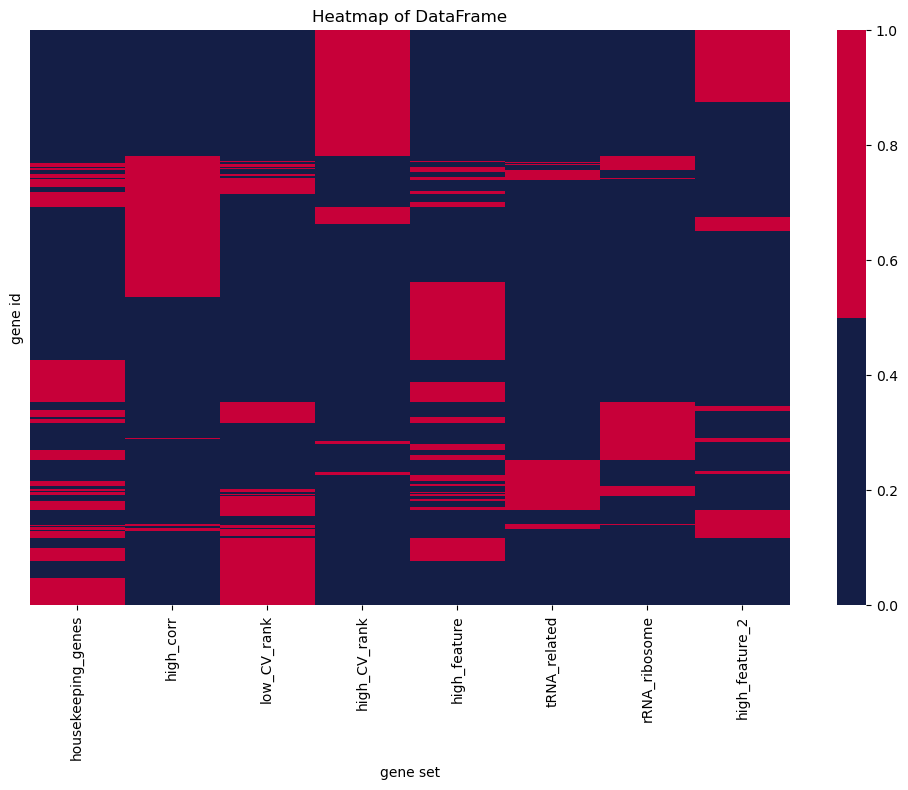

In [2]:
gene_set=pd.read_csv("DATA/fig4/gene_set.csv",index_col='gene_id')
print(gene_set.sum())

Z = linkage(gene_set, 'ward')
labels = fcluster(Z, t=1.5, criterion='distance')
new_df = gene_set.copy()
new_df['Cluster'] = labels
new_df = new_df.sort_values(by="Cluster")
new_df=new_df.iloc[0:new_df.shape[0],0:8]
plt.figure(figsize=(10,8))
sns.heatmap(new_df, cmap=['#141E46','#C70039'],yticklabels=False)

plt.title('Heatmap of DataFrame')
plt.xlabel('gene set')
plt.ylabel('gene id')
plt.tight_layout() 
#plt.savefig('Heatmap_of_DataFrame.pdf', format='pdf')
plt.show()

# fig4. c

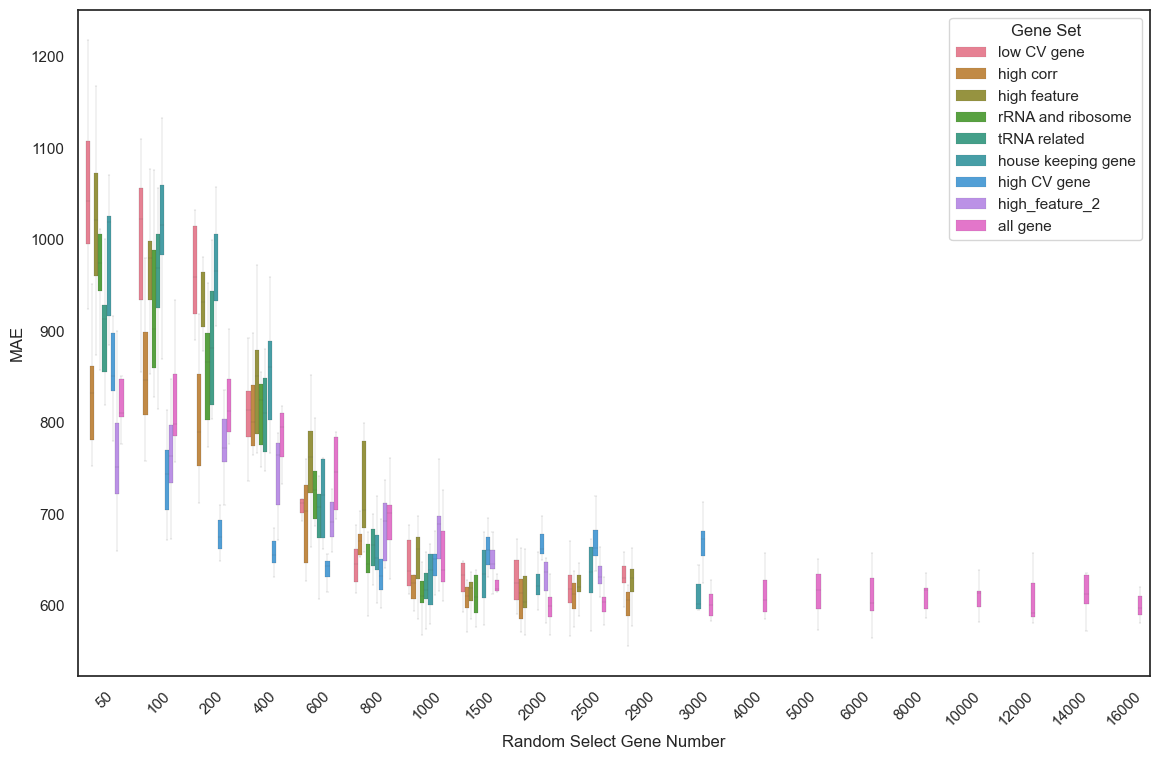

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
gene_set_pridict_plot=pd.read_csv("DATA/fig4/gene_set_pridict_plot.csv")

df1=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="low_CV_rank"]
df2=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="high_corr"]
df3=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="high_feature"]
df4=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="rRNA_ribosome"]
df5=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="tRNA_related"]
df6=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="HK"]
df7=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="high_CV"]
df8=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="high_feature_2"]
df9=gene_set_pridict_plot[gene_set_pridict_plot["gene_set"]=="random"]

merged_df = pd.concat([df1.assign(Gene_Set='low CV gene'), 
                       df2.assign(Gene_Set='high corr'), 
                       df3.assign(Gene_Set='high feature'), 
                       df4.assign(Gene_Set='rRNA and ribosome'), 
                       df5.assign(Gene_Set='tRNA related'),
                       df6.assign(Gene_Set='house keeping gene'),
                       df7.assign(Gene_Set='high CV gene'),
                       df8.assign(Gene_Set='high_feature_2'),
                       df9.assign(Gene_Set='all gene')])

plt.figure(figsize=(12, 8))
sns.set_context("notebook", rc={"font.size": 20})
sns.set_style("white")
sns.boxplot(x="gene_number", y="mae", hue="Gene_Set", data=merged_df,
            palette="husl", linewidth=0.1, width=0.71, sym="") 
plt.xlabel("Random Select Gene Number")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend(title="Gene Set", loc='upper right')
plt.tight_layout()
plt.savefig("gene set MAE.pdf",dpi=600)
plt.show()

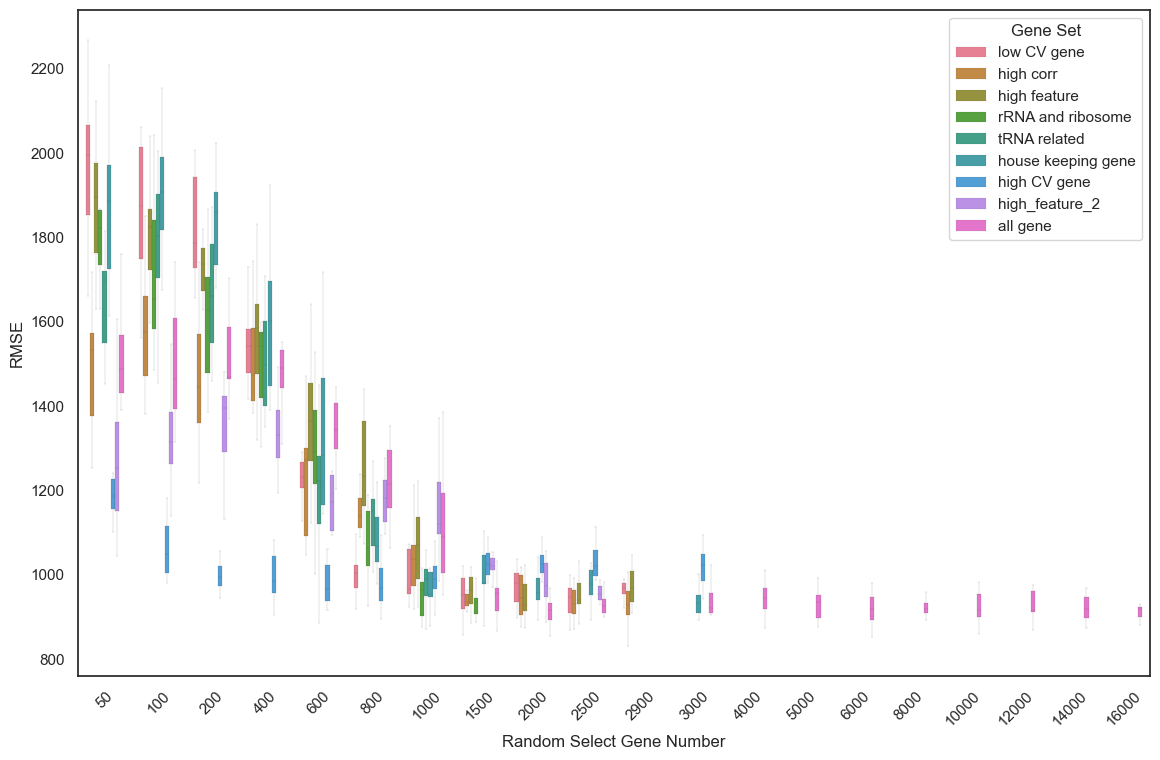

In [3]:
merged_df = pd.concat([df1.assign(Gene_Set='low CV gene'), 
                       df2.assign(Gene_Set='high corr'), 
                       df3.assign(Gene_Set='high feature'), 
                       df4.assign(Gene_Set='rRNA and ribosome'), 
                       df5.assign(Gene_Set='tRNA related'),
                       df6.assign(Gene_Set='house keeping gene'),
                       df7.assign(Gene_Set='high CV gene'),
                       df8.assign(Gene_Set='high_feature_2'),
                       df9.assign(Gene_Set='all gene')])
plt.figure(figsize=(12, 8))
sns.set_context("notebook", rc={"font.size": 20})
sns.set_style("white")
sns.boxplot(x="gene_number", y="rmse", hue="Gene_Set", data=merged_df,
            palette="husl", linewidth=0.1, width=0.71, sym="")
plt.xlabel("Random Select Gene Number")
plt.ylabel("RMSE") 
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend(title="Gene Set", loc='upper right')
plt.tight_layout() 
plt.savefig("gene set RMSE.pdf",dpi=600)
plt.show()

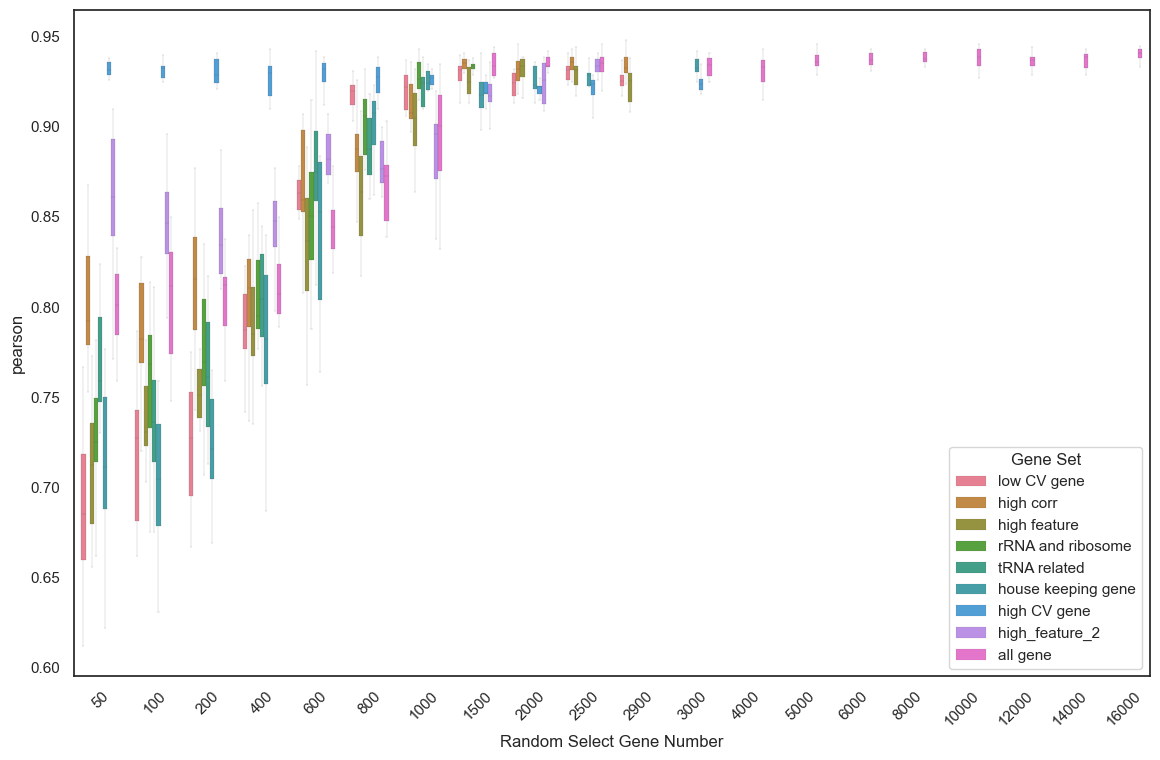

In [4]:
merged_df = pd.concat([df1.assign(Gene_Set='low CV gene'), 
                       df2.assign(Gene_Set='high corr'), 
                       df3.assign(Gene_Set='high feature'), 
                       df4.assign(Gene_Set='rRNA and ribosome'), 
                       df5.assign(Gene_Set='tRNA related'),
                       df6.assign(Gene_Set='house keeping gene'),
                       df7.assign(Gene_Set='high CV gene'),
                       df8.assign(Gene_Set='high_feature_2'),
                       df9.assign(Gene_Set='all gene')])
plt.figure(figsize=(12, 8))
sns.set_context("notebook", rc={"font.size": 20})
sns.set_style("white")
sns.boxplot(x="gene_number", y="pearson", hue="Gene_Set", data=merged_df,
            palette="husl", linewidth=0.1, width=0.71, sym="") 
plt.xlabel("Random Select Gene Number")
plt.ylabel("pearson")
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend(title="Gene Set", loc='lower right')
plt.tight_layout()
plt.savefig("gene set pearson.pdf",dpi=600)
plt.show()

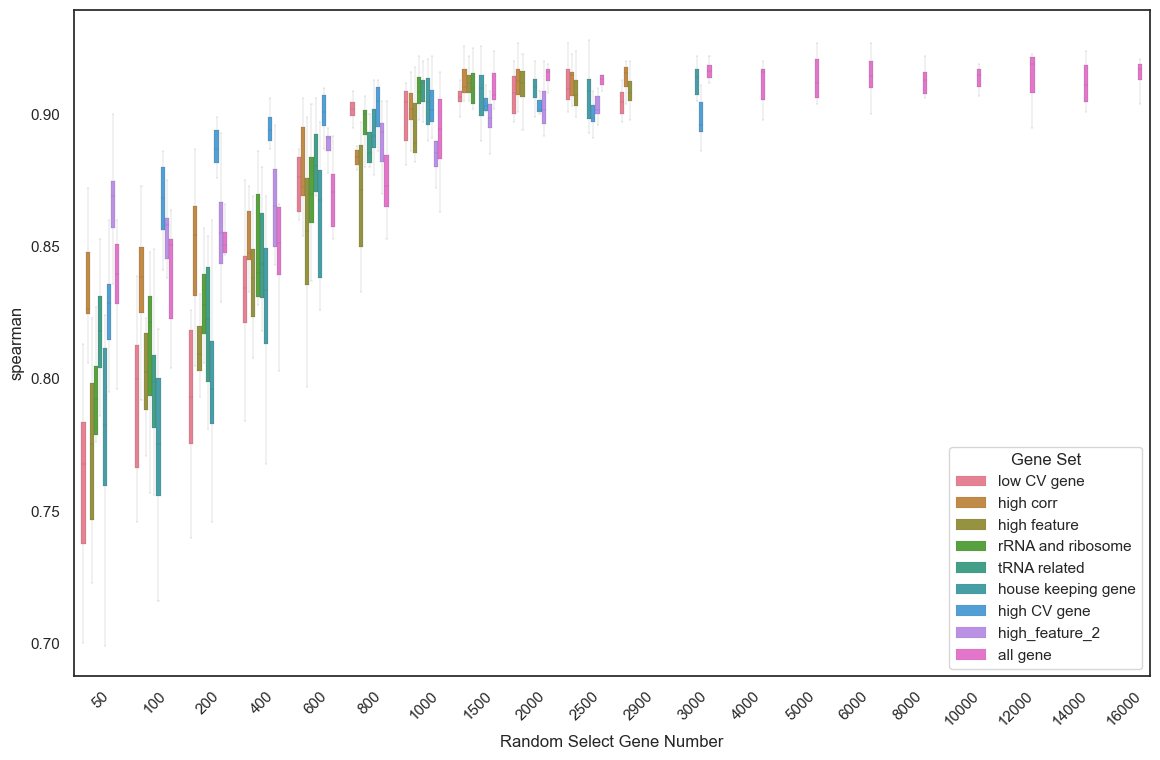

In [5]:
merged_df = pd.concat([df1.assign(Gene_Set='low CV gene'), 
                       df2.assign(Gene_Set='high corr'), 
                       df3.assign(Gene_Set='high feature'), 
                       df4.assign(Gene_Set='rRNA and ribosome'), 
                       df5.assign(Gene_Set='tRNA related'),
                       df6.assign(Gene_Set='house keeping gene'),
                       df7.assign(Gene_Set='high CV gene'),
                       df8.assign(Gene_Set='high_feature_2'),
                       df9.assign(Gene_Set='all gene')])

plt.figure(figsize=(12, 8))
sns.set_context("notebook", rc={"font.size": 20})
sns.set_style("white")
sns.boxplot(x="gene_number", y="spearman", hue="Gene_Set", data=merged_df,
            palette="husl", linewidth=0.1, width=0.71, sym="")
plt.xlabel("Random Select Gene Number") 
plt.ylabel("spearman")
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend(title="Gene Set", loc='lower right')
plt.tight_layout()
plt.savefig("gene set spearman.pdf",dpi=600)
plt.show()

# fig4. d

## u-test

### pearson

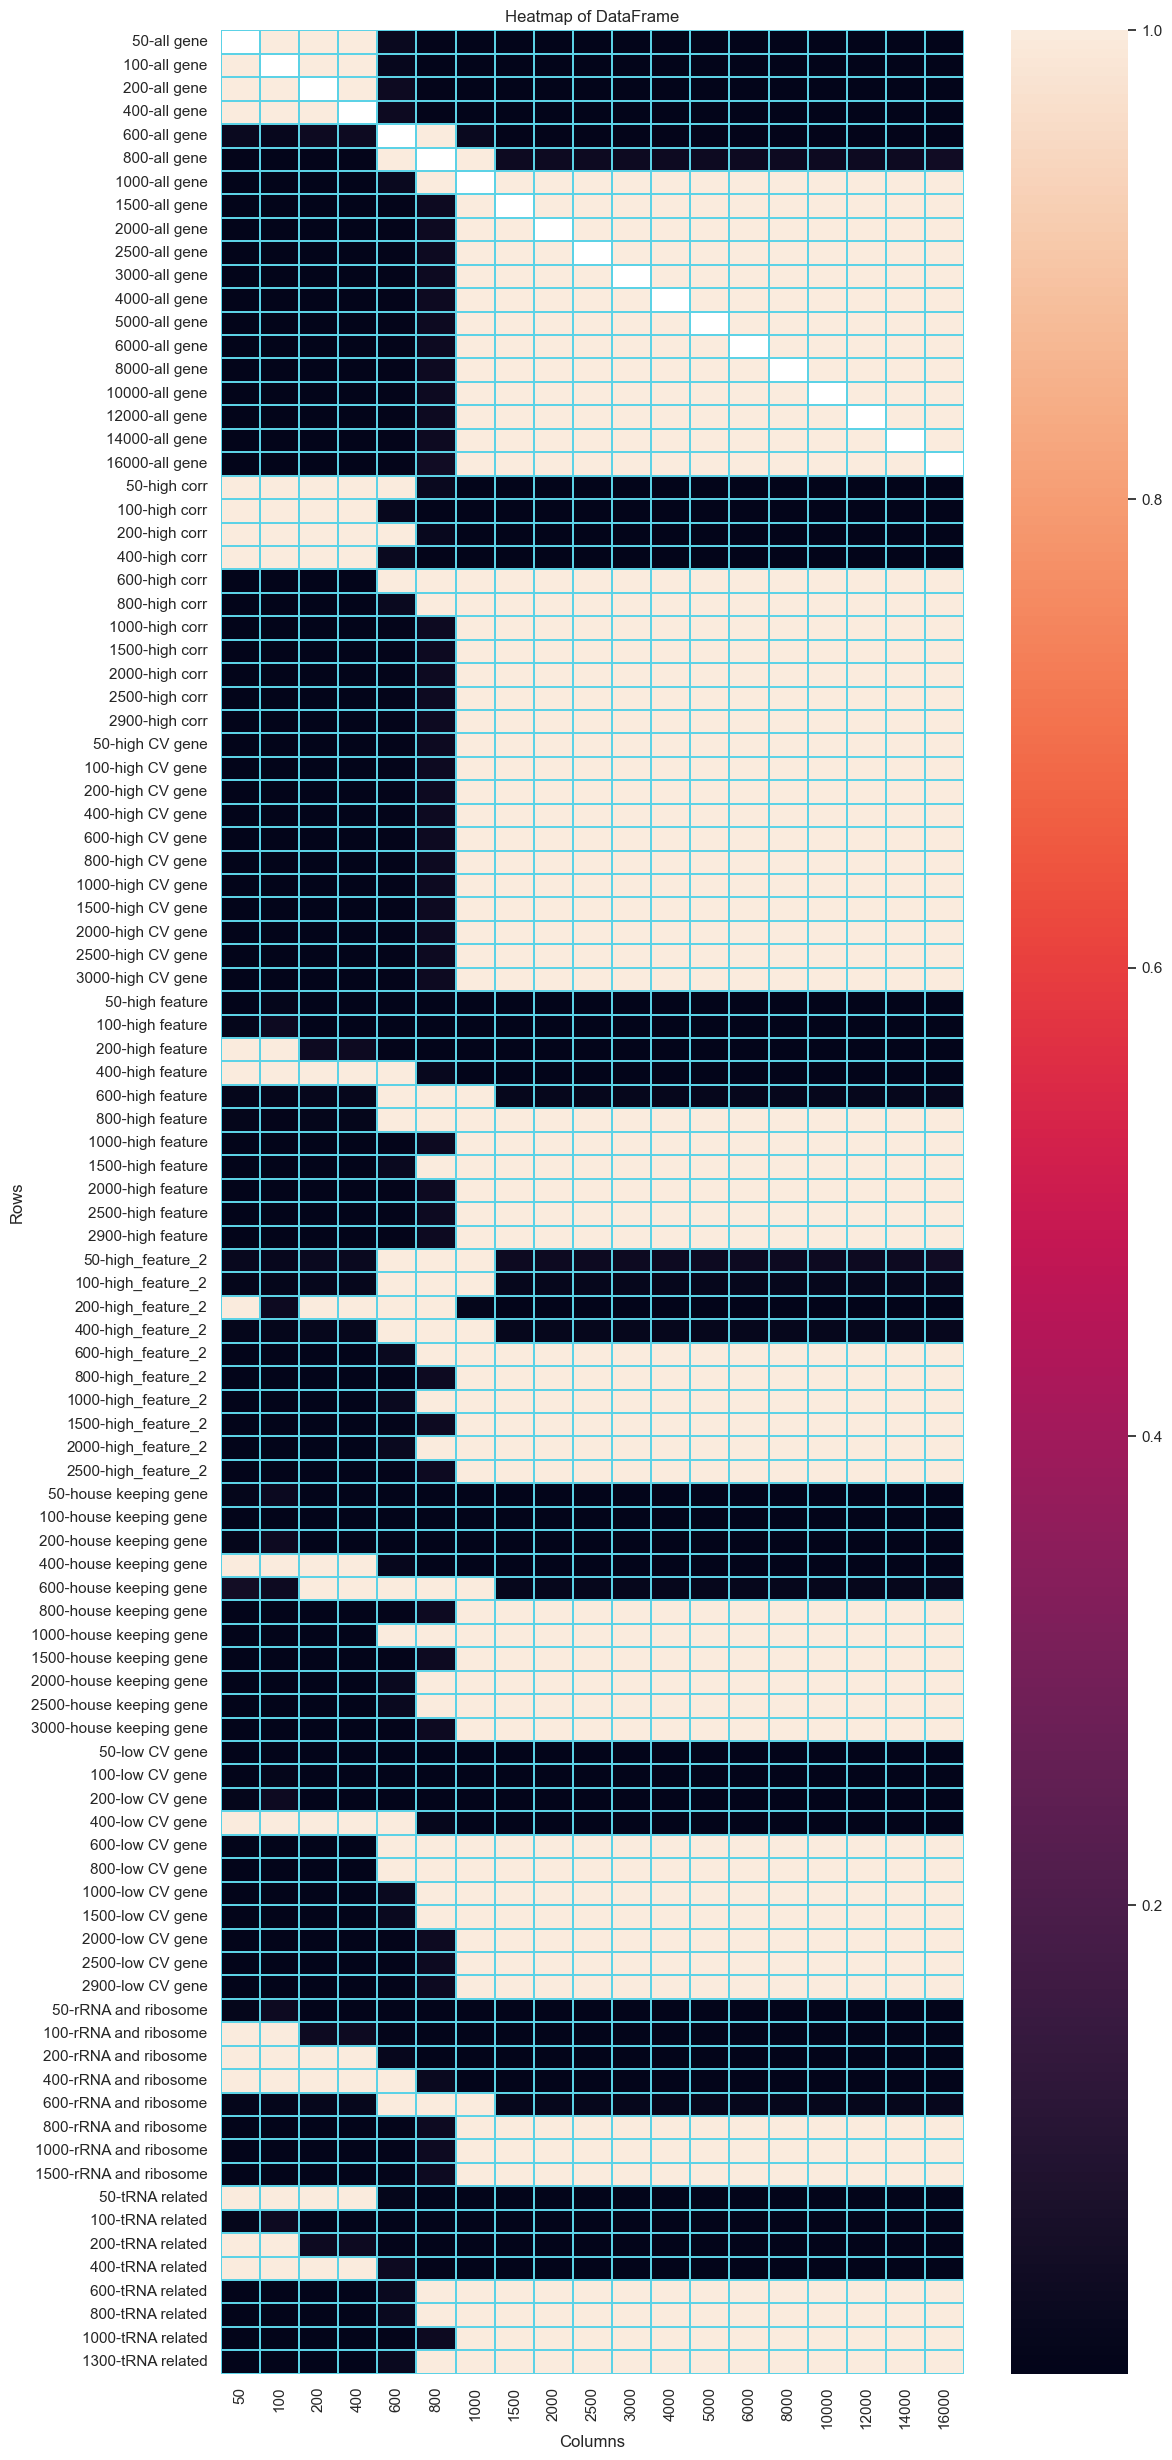

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("DATA/fig4/utest-Matrix-pearson.csv",index_col=0)
data = data.applymap(lambda x: 1 if x > 0.05 else x)
data

plt.figure(figsize=(12,25))
sns.heatmap(data,linecolor="#5CD2E6", linewidths=0.05)

plt.title('Heatmap of DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.savefig("gene set Utest pearson.pdf",dpi=600)
plt.show()

### mae

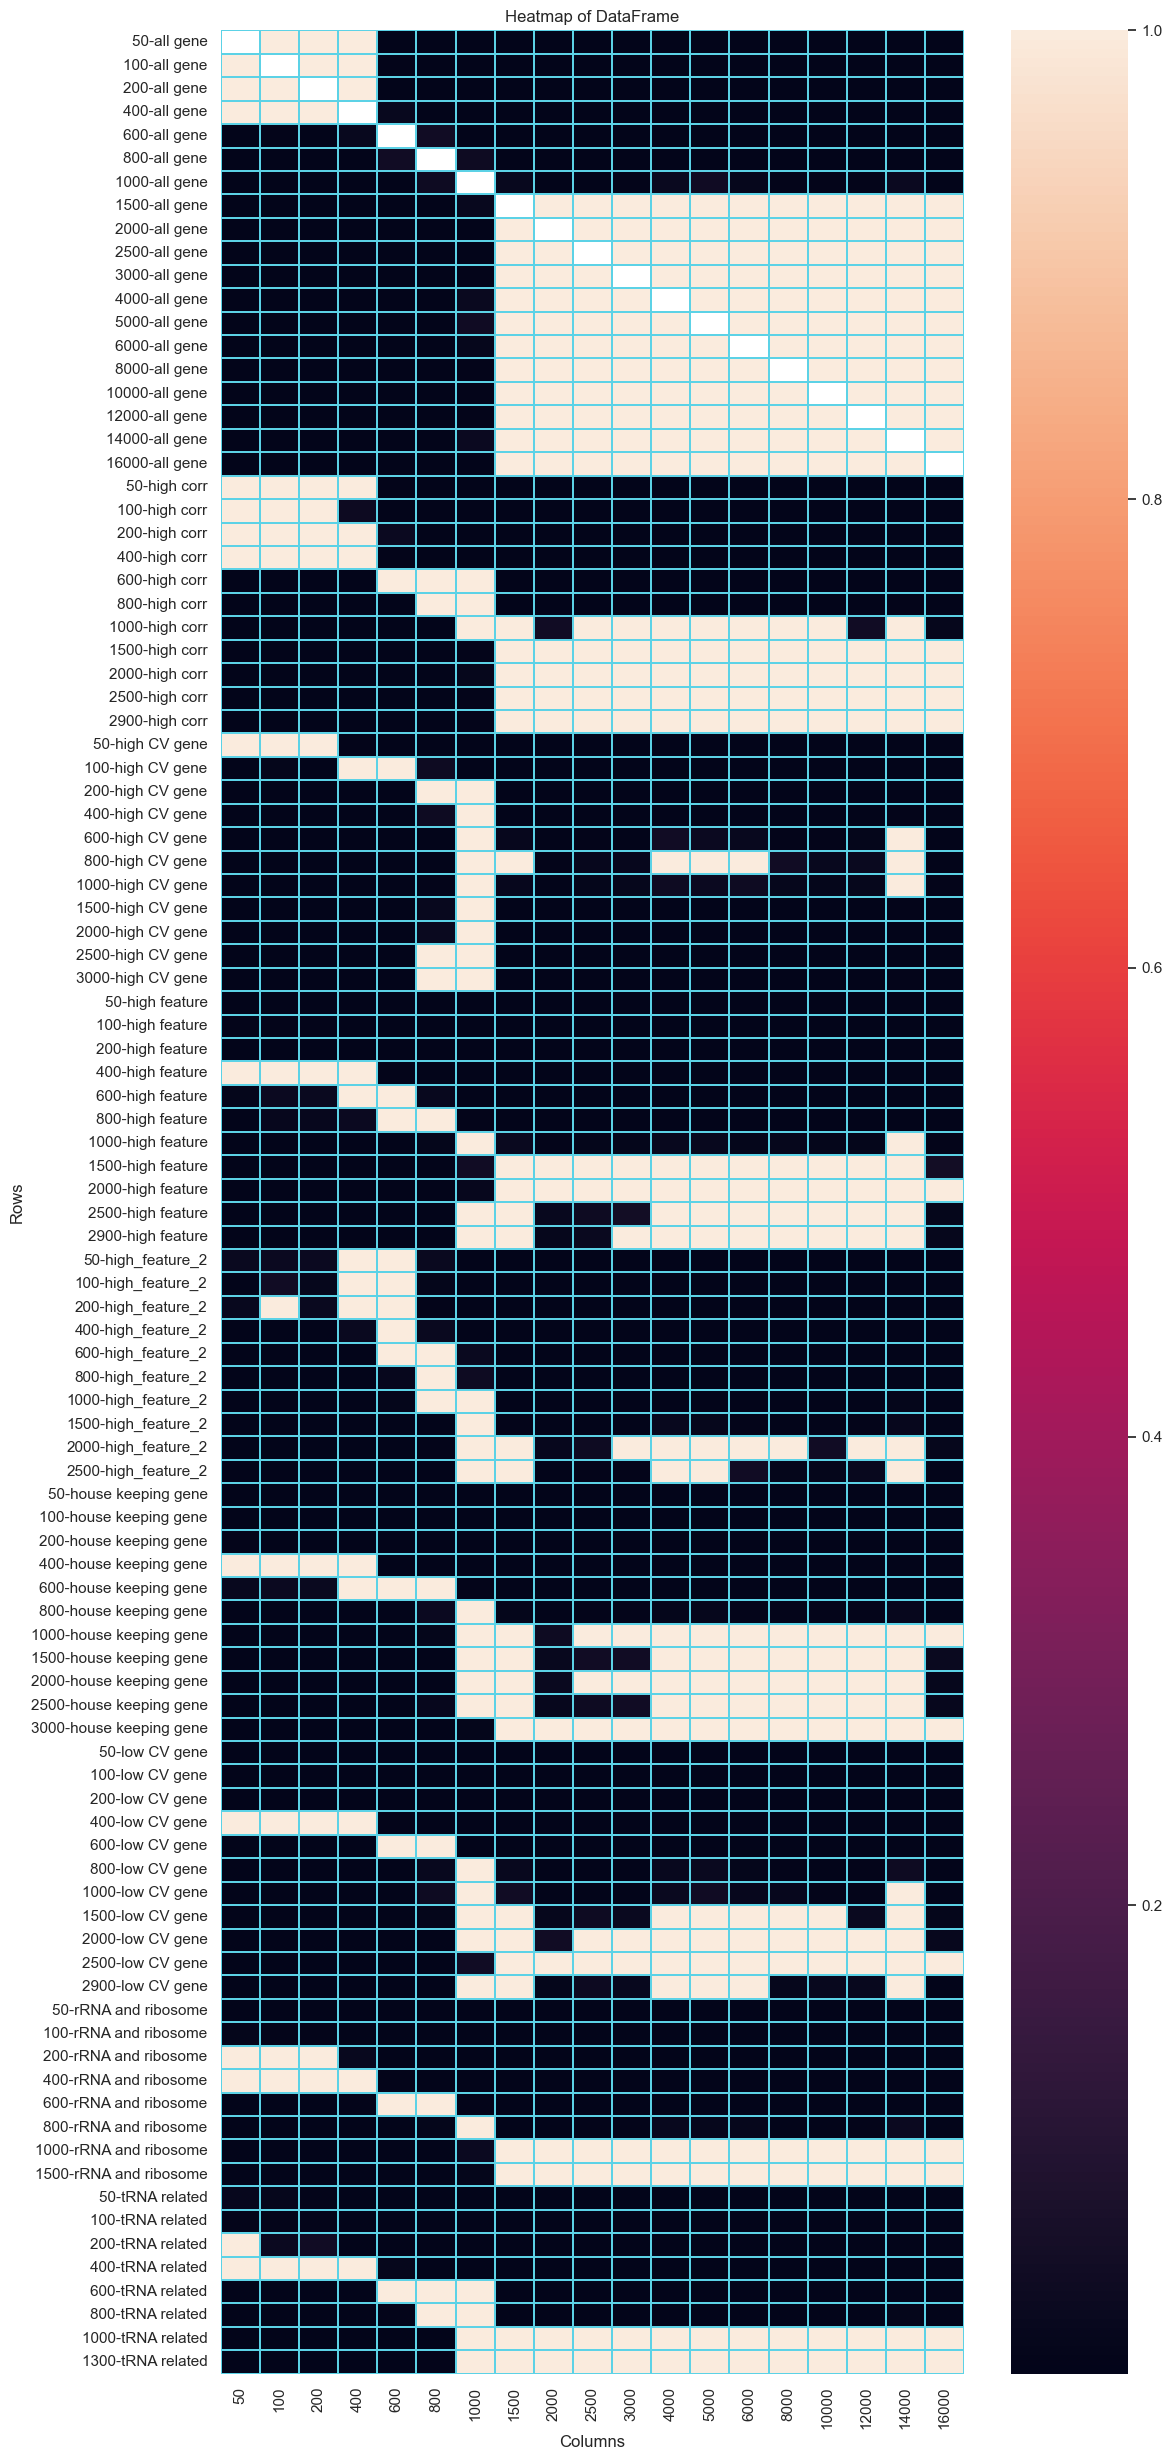

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("DATA/fig4/utest-Matrix-mae.csv",index_col=0)
data = data.applymap(lambda x: 1 if x > 0.05 else x)
data

plt.figure(figsize=(12,25))
sns.heatmap(data,linecolor="#5CD2E6", linewidths=0.05)

plt.title('Heatmap of DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout() 
plt.savefig("gene set Utest mae.pdf",dpi=600)
plt.show()

### rmse

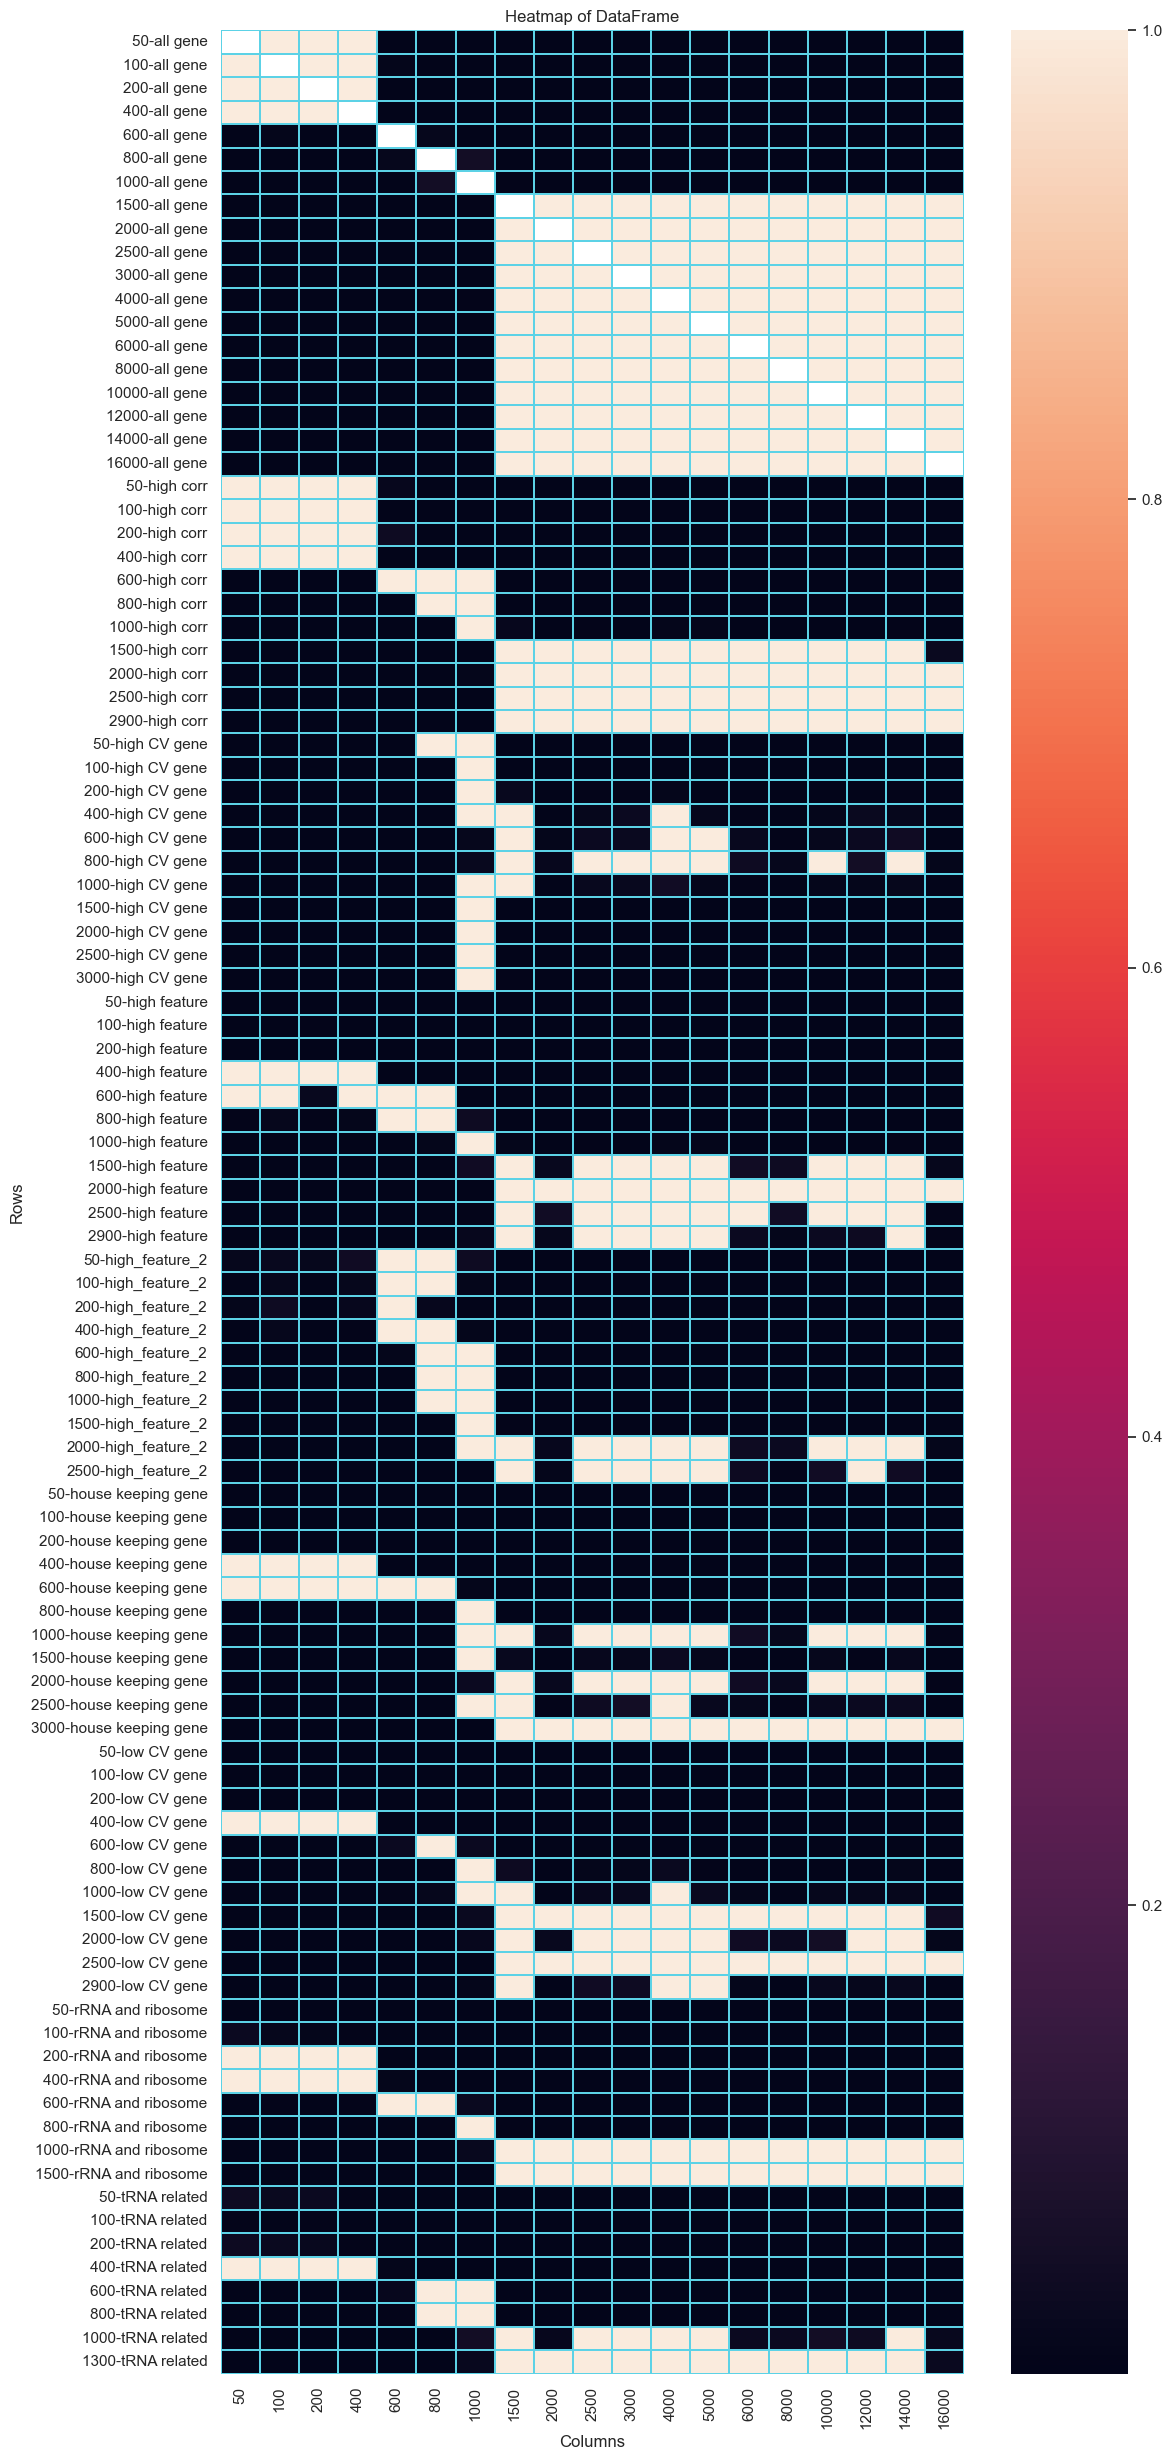

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("DATA/fig4/utest-Matrix-rmse.csv",index_col=0)
data = data.applymap(lambda x: 1 if x > 0.05 else x)
data

plt.figure(figsize=(12,25))
sns.heatmap(data,linecolor="#5CD2E6", linewidths=0.05)

plt.title('Heatmap of DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout() 
plt.savefig("gene set Utest rmse.pdf",dpi=600)
plt.show()

### spearman

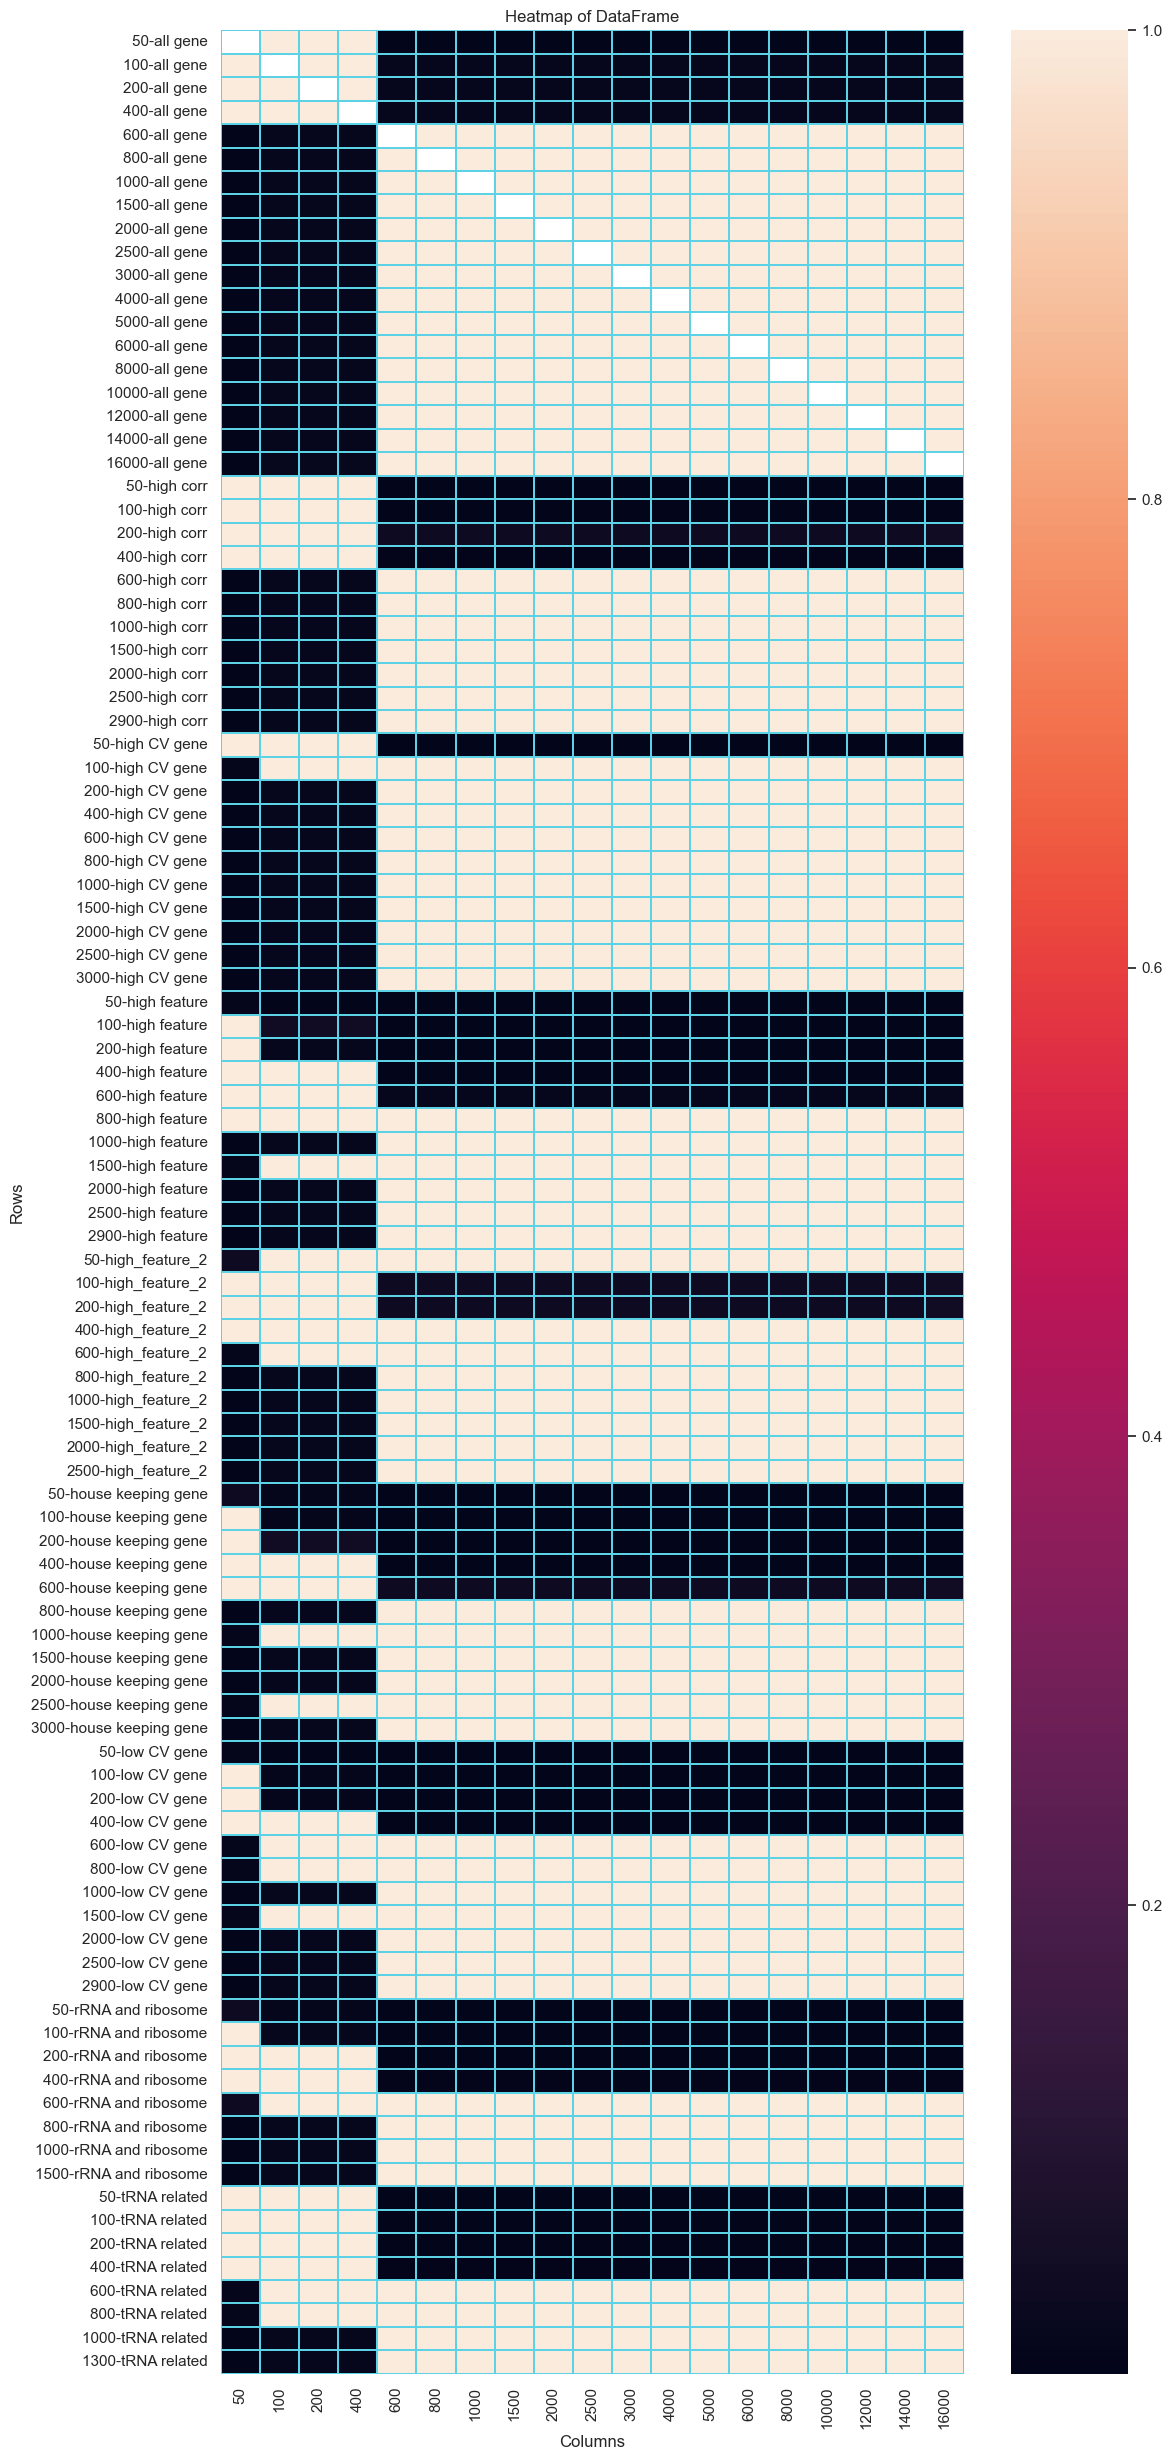

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("DATA/fig4/utest-Matrix-spearman.csv",index_col=0)
data = data.applymap(lambda x: 1 if x > 0.05 else x)
data

plt.figure(figsize=(12,25))
sns.heatmap(data,linecolor="#5CD2E6", linewidths=0.05)

plt.title('Heatmap of DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.savefig("gene set Utest spearman.pdf",dpi=600)
plt.show()

## t-test

### pearson

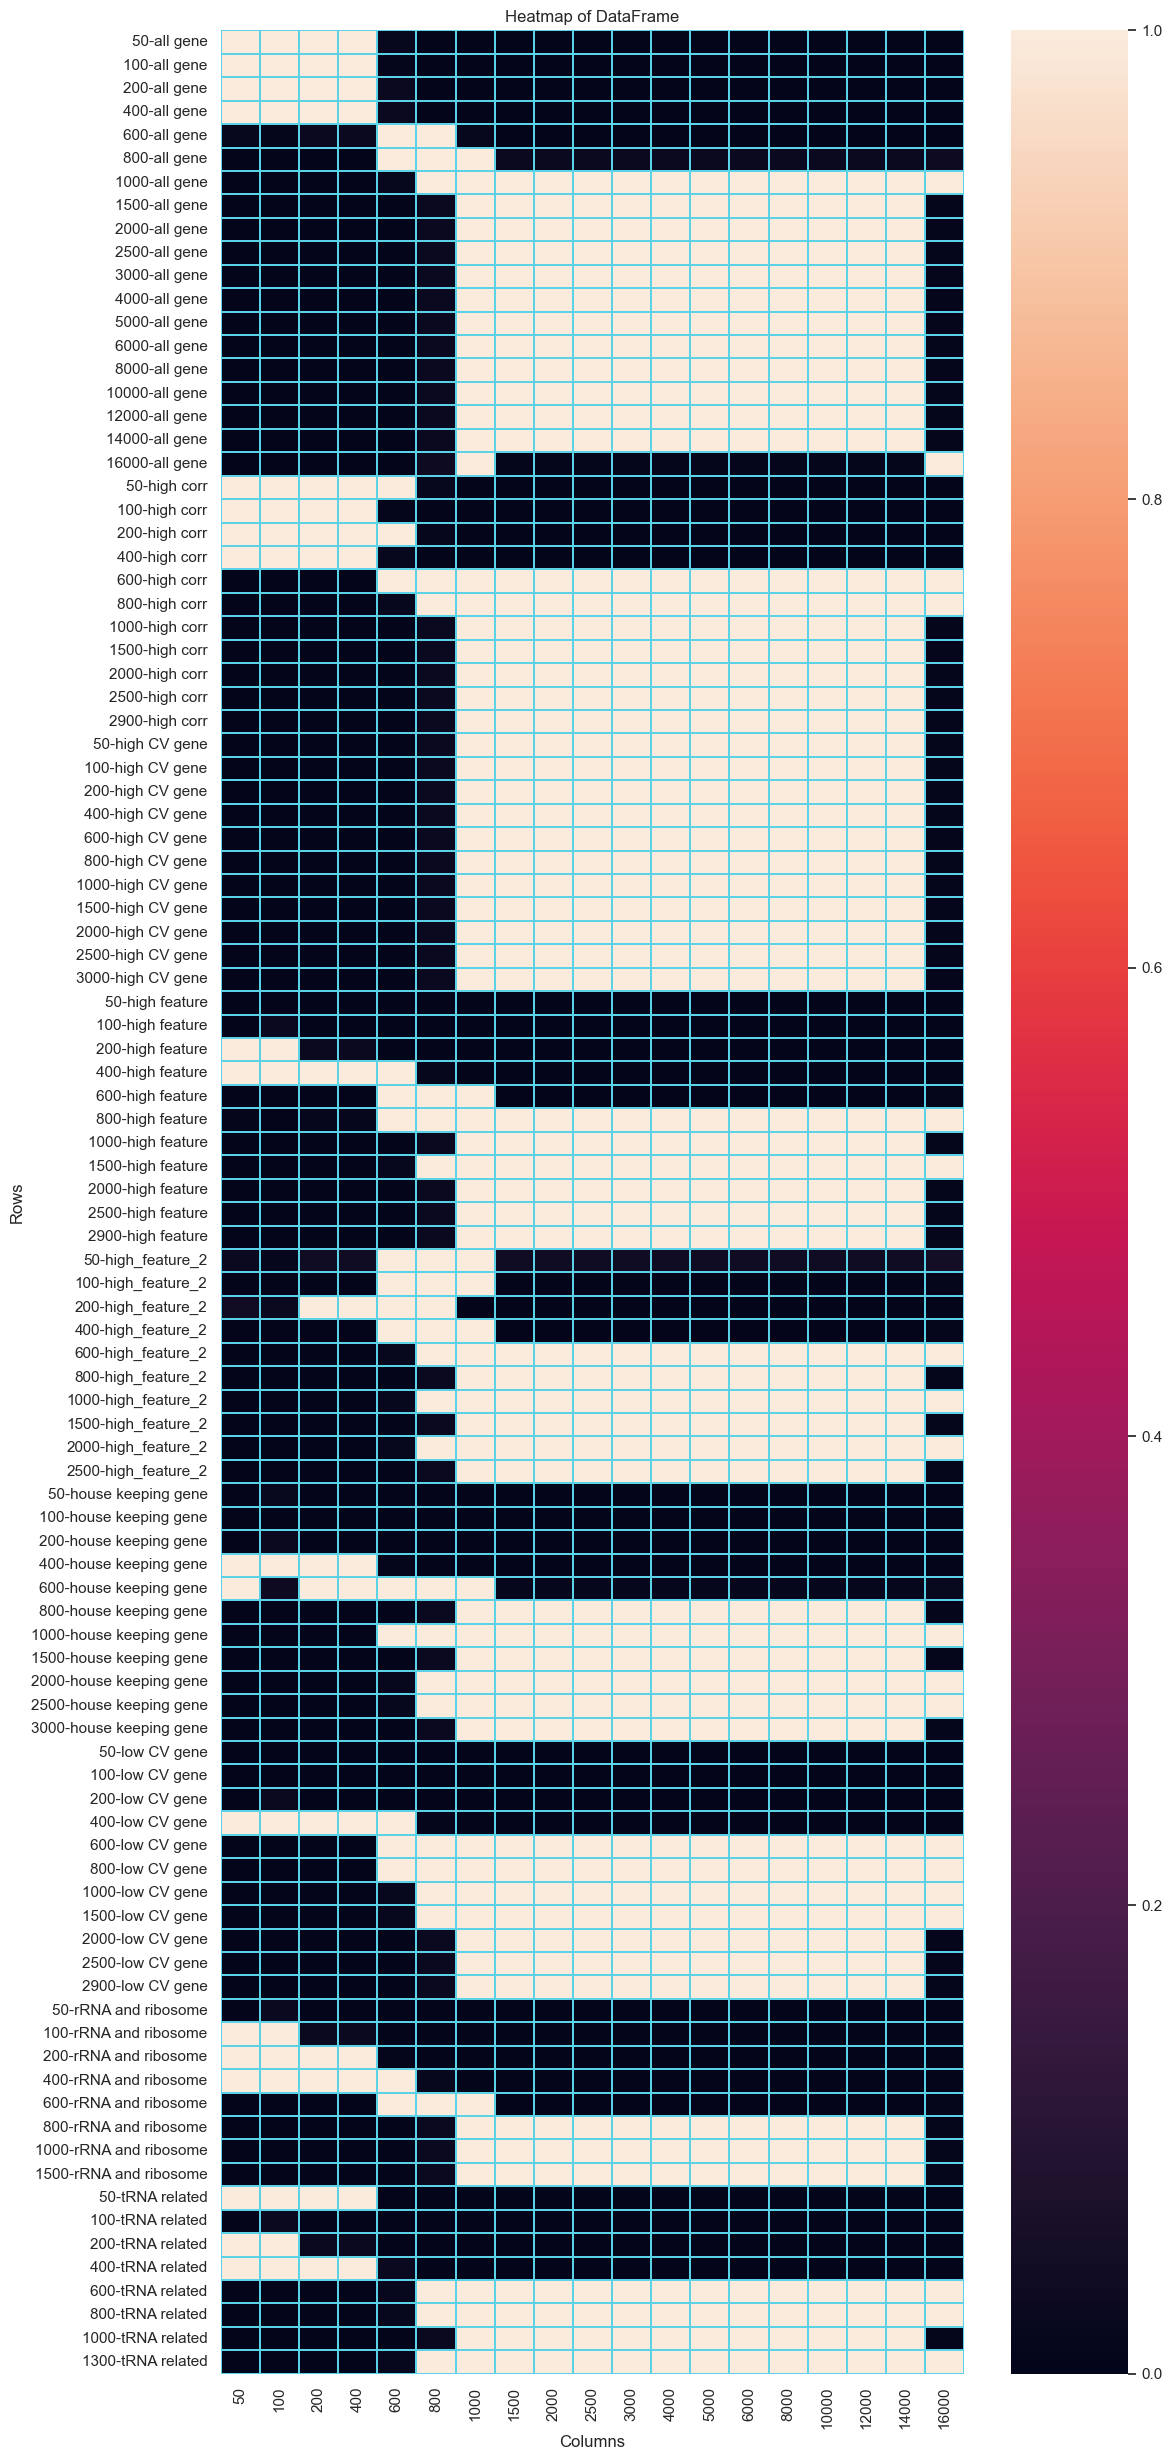

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("DATA/fig4/ttest-Matrix-pearson.csv",index_col=0)
data = data.applymap(lambda x: 1 if x > 0.05 else x)
data

plt.figure(figsize=(12,25))
sns.heatmap(data,linecolor="#5CD2E6", linewidths=0.05)

plt.title('Heatmap of DataFrame')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.savefig("gene set ttest pearson.pdf",dpi=600)
plt.show()